In [47]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted

In [2]:
def wrangle(file):
    conn = sqlite3.connect(file)

    query = """
    select distinct(i.building_id) as b_id, b.*, bd.damage_grade from id_map i
    join building_structure b
    on i.building_id = b.building_id
    join building_damage bd
    on i.building_id = bd.building_id
    where i.district_id = 28
    """

    df = pd.read_sql(query, conn, index_col="b_id")

    drop_cols = [col for col in df.columns if 'post_eq' in col]
    df['damage_grade'] = df['damage_grade'].str[-1].astype(int)

    drop_cols.append('count_floors_pre_eq')

    drop_cols.append('building_id')
    df.drop(columns=drop_cols, inplace=True)

    return df

In [3]:
df = wrangle("C:\\Users\\USER\\nepal_eq.db")

In [4]:
df.head()

,age_building,foundation_type,ground_floor_type,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,damage_grade
b_id,,,,,,,,,,,,
2.801020e+11,7,Mud mortar-Stone/Brick,Mud,14,Flat,TImber/Bamboo-Mud,Rectangular,200,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,5
2.801010e+11,18,Mud mortar-Stone/Brick,Mud,15,Moderate slope,Timber-Planck,Rectangular,450,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,3
2.801010e+11,20,Mud mortar-Stone/Brick,Mud,15,Moderate slope,Timber-Planck,Rectangular,500,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,4
2.801010e+11,21,Mud mortar-Stone/Brick,Mud,24,Moderate slope,Timber-Planck,Rectangular,350,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,3
2.801010e+11,20,Mud mortar-Stone/Brick,Mud,24,Moderate slope,TImber/Bamboo-Mud,Rectangular,280,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,5


In [5]:
df.damage_grade.unique()

array([5, 3, 4, 1, 2])

In [6]:
count = Counter(df['damage_grade'])
count

Counter({5: 40295, 4: 23284, 3: 8209, 2: 2745, 1: 2615})

In [7]:
df.foundation_type.nunique()

5

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Mud mortar-Stone/Brick'),
  Text(1, 0, 'Cement-Stone/Brick'),
  Text(2, 0, 'RC'),
  Text(3, 0, 'Bamboo/Timber'),
  Text(4, 0, 'Other')])

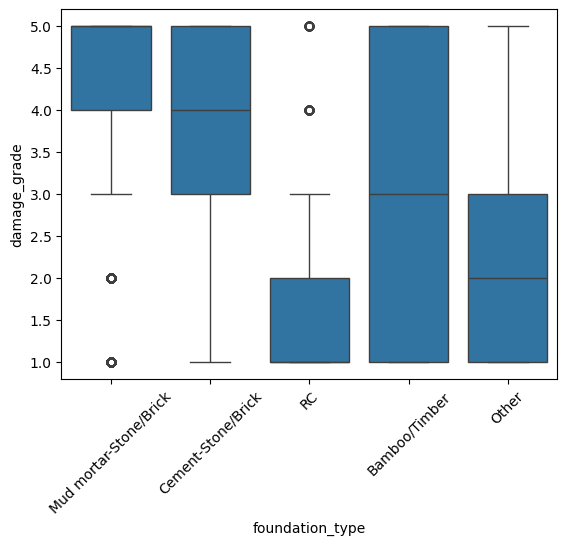

In [27]:
sns.boxplot(x='foundation_type', y='damage_grade', data=df)
plt.xticks(rotation=45)

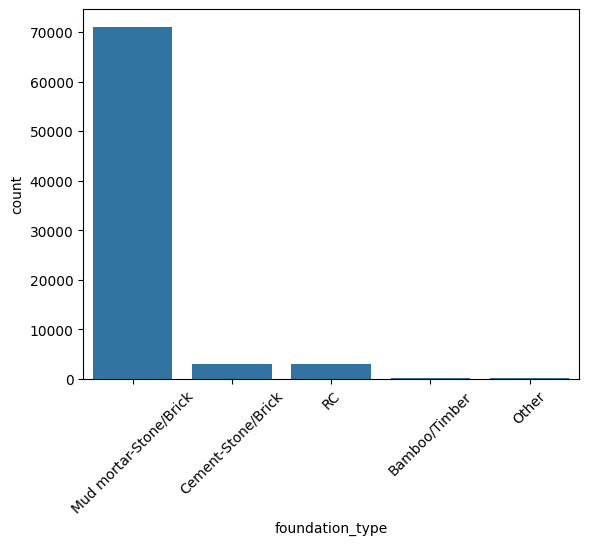

In [25]:
sns.countplot(x='foundation_type', data=df)
plt.xticks(rotation=45)
plt.show()

In [28]:
df.head()

,age_building,foundation_type,ground_floor_type,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,damage_grade
b_id,,,,,,,,,,,,
2.801020e+11,7,Mud mortar-Stone/Brick,Mud,14,Flat,TImber/Bamboo-Mud,Rectangular,200,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,5
2.801010e+11,18,Mud mortar-Stone/Brick,Mud,15,Moderate slope,Timber-Planck,Rectangular,450,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,3
2.801010e+11,20,Mud mortar-Stone/Brick,Mud,15,Moderate slope,Timber-Planck,Rectangular,500,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,4
2.801010e+11,21,Mud mortar-Stone/Brick,Mud,24,Moderate slope,Timber-Planck,Rectangular,350,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,3
2.801010e+11,20,Mud mortar-Stone/Brick,Mud,24,Moderate slope,TImber/Bamboo-Mud,Rectangular,280,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,5


In [30]:
cols=[]

for i in df.columns:
    if df[i].dtype=='object':
        cols.append(i)

In [33]:
le = LabelEncoder()

In [36]:
for col in cols:
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3]
[0 1 2]
[ 0  1  2  3  4  5  6  7  8  9 10]


In [38]:
X= df.drop(['damage_grade'], axis=1)
y=df['damage_grade']

In [41]:
smote = SMOTE(random_state=30)

X_smote, y_smote = smote.fit_resample(X, y)

In [42]:
len(X_smote), len(y_smote)

(201475, 201475)

In [43]:
X = X_smote
y = y_smote

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = Pipeline(
    [
        ('ss', StandardScaler()),
        ('rf', RandomForestClassifier())
    ]
)


In [49]:
model.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('rf', RandomForestClassifier())])

In [51]:
accuracy_score(y_train, model.predict(X_train))

0.9563345328204492

In [53]:
model.score(X_train, y_train)

0.9563345328204492